# Week08_Q&A Activity on Testing of Hypothesis

1. **Carry out descriptive analytics on the dataset.**
2. **Check whether female and male students scored the same marks.**
3. **Whether test preparation helps the students?**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv("Week_8_Q&A_dataset - Sheet1.csv")

### 1.Descriptive analytics on the dataset.

In [6]:
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [8]:
data.shape

(28, 3)

In [7]:
data.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [9]:
data.describe(include='all')

,Gender,Test preparation,Total Marks
count,28,28,28.000000
unique,2,2,NaN
top,female,none,NaN
freq,16,21,NaN
mean,NaN,NaN,32.321429
std,NaN,NaN,12.454520
min,NaN,NaN,12.000000
25%,NaN,NaN,22.500000
50%,NaN,NaN,33.000000
75%,NaN,NaN,43.250000


In [61]:
data.groupby(["Gender","Test preparation"]).mean()

Total Marks
Gender Test preparation             
female completed           45.250000
       none                29.916667
male   completed           43.666667
       none                26.000000

<AxesSubplot:xlabel='Total Marks', ylabel='Density'>

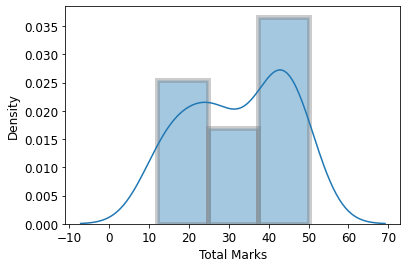

In [66]:
sns.distplot(data['Total Marks'],hist_kws=dict(edgecolor="grey",linewidth=5))

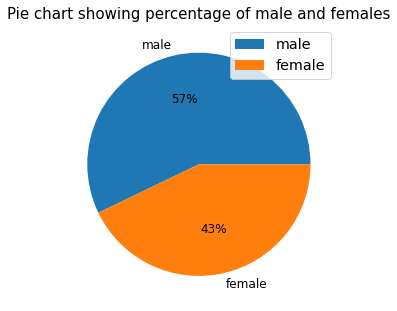

In [62]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=(5,8))
plt.title("Pie chart showing percentage of male and females",fontsize=15)
plt.pie(data['Gender'].value_counts(), labels = data['Gender'].unique(), autopct='%.0f%%')
plt.legend(data['Gender'].unique(),loc="upper right",fontsize='large')
plt.show()

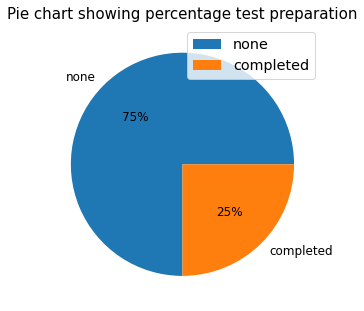

In [63]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=(5,8))
plt.title("Pie chart showing percentage test preparation",fontsize=15)
plt.pie(data['Test preparation'].value_counts(), labels = data['Test preparation'].unique(), autopct='%.0f%%')
plt.legend(data['Test preparation'].unique(),loc="upper right",fontsize='large')
plt.show()

In [73]:
df_fem = data[data['Gender']=='female']
df_fem

,Gender,Test preparation,Total Marks
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
7,female,none,12
14,female,none,41
15,female,none,13
16,female,completed,48
17,female,none,45


In [74]:
df_male = data[data['Gender']=='male']
df_male

,Gender,Test preparation,Total Marks
0,male,none,14
6,male,none,30
8,male,none,18
9,male,none,24
10,male,completed,44
11,male,none,23
12,male,completed,43
13,male,none,28
18,male,none,47
19,male,none,36


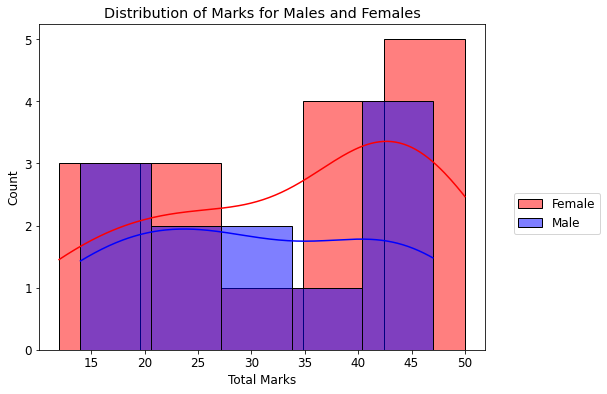

In [79]:
#comparing the disbn of marks for fem and males

plt.figure(figsize = (8,6))
sns.histplot(df_fem['Total Marks'],
         label='Female', kde=True, color='red')
  
sns.histplot(df_male['Total Marks'],
         label='Male',kde=True, color='blue')
  
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, .5))
plt.title('Distribution of Marks for Males and Females')
plt.show()

**Findings**
- There are no null-values in the dataset.
- from histplot and distplot, most of the students scores between 44 to 50. Less no.of students score between 25 to 39.
- We find that the count of females is 14% more than the count of males.
- Considering the 'Test Prep' status, 78% students didn't attempt or complete the preparation while 25% students completed the Test Prep.
- 'completed' test preparation has resulted in scoring avg 45 marks for females and avg 43 marks for males
- 'none' test preparation has resulted in scoring only avg 29 marks for females and avg 26 marks for males
- We also find that students who completed the Test Prep has performed extremely well in the exams.
  However, there are a few students who performed well even without completing the Test preparation.

- Most of females scores above 40.

### 2.Check whether female and male students scored the same marks.

In [47]:
data.groupby('Gender').agg(['mean','std'])

Total Marks           
              mean        std
Gender                       
female   33.750000  12.865976
male     30.416667  12.168950

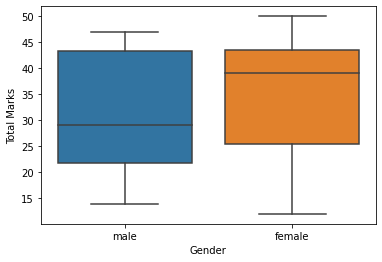

In [15]:
sns.boxplot(x='Gender',y='Total Marks',data=data)
plt.show()

**Hypothesis**
- H0: The Mean of Total Marks scored by Female students and Male students are equal. 
- H1: The Mean of Total Marks scored by Female students and Male students are not equal. 

In [36]:
grouped=data.groupby("Gender")
male=grouped.get_group('male')
female=grouped.get_group('female')


In [69]:
ttest,pval = stats.ttest_ind(female["Total Marks"],male["Total Marks"])
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis i.e. Female and male students does not score same marks")
else:
  print("We accept null hypothesis i.e.Female and male students scores same marks")

p-value 0.4937822317960763
We accept null hypothesis i.e.Female and male students scores same marks


**The scores of males and females are the same.**

### 3. Whether test preparation helps the students?

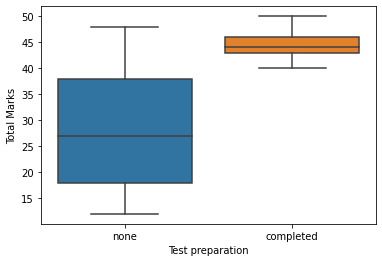

In [16]:
sns.boxplot(x='Test preparation',y='Total Marks',data=data)
plt.show()

**Hypothesis**
- H0: Test preparation has no effect on students performance

- H1: Test preparation effected in increasing student's Marks

In [10]:
grouped=data.groupby("Test preparation")
none=grouped.get_group('none')
completed=grouped.get_group('completed')

In [13]:
ttest,pval = stats.ttest_ind(completed['Total Marks'],none['Total Marks'],alternative='greater')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis i.e. Mean Score of students who completed the test preparation > Mean Score of students who did not complete the test preparation")
else:
  print("We accept null hypothesis i.e. Mean Score of students who completed the test preparation <= Mean Score of students who did not complete the test preparation")


p-value 0.0006335646228660053
We reject null hypothesis i.e. Mean Score of students who completed the test preparation > Mean Score of students who did not complete the test preparation


**The test preparation helps the students to gain higher marks.**



In [ ]:
#Submitted by Group12